In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [2]:
workbook = xlrd.open_workbook('Input.xlsx')
worksheet = workbook.sheet_by_name('Data')

In [3]:
N = 86
R1 = zeros(N)
R2 = zeros(N)
R3 = zeros(N)
R4 = zeros(N)
B_rem = zeros(N)
Pi1 = zeros(N)
Pi2 = zeros(N)
B = zeros(N)

for i in range(N):
    R1[i] = worksheet.cell(0, i).value
    R2[i] = worksheet.cell(1, i).value
    R3[i] = worksheet.cell(2, i).value
    R4[i] = worksheet.cell(3, i).value
    B_rem[i] = worksheet.cell(4, i).value
    B[i] = worksheet.cell(5, i).value
    #B[i] = worksheet.cell(6, i).value

In [4]:
h = R3-R2
V_magnet = (R4**2 - R3**2 + R2**2-R1**2)
V_gap = (R3**2 - R2**2)
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = R4**2 - R3**2
V_t = R4**2 - R1**2

In [5]:
B[36:56]

array([1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 , 1.75,
       1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 ])

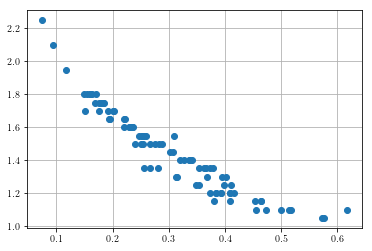

In [6]:
#plt.plot(V_magnet,eta,'o')
#plt.plot((V_gap[0:12]/(V_out[0:12]*0.6)),B[0:12],'o')
#plt.plot((V_gap[12:24]/(V_out[12:24]*0.6)),B[12:24],'o')
#plt.plot((V_gap[24:36]/(V_out[24:36]*0.6)),B[24:36],'o')
#plt.plot((V_gap[36:56]/(V_out[36:56]*0.6)),B[36:56],'o')
#plt.plot((V_gap[48:59]/(V_out[48:59]*0.6)),B[48:59],'o')

plt.plot((V_gap/(V_out*0.6)),B,'o')

plt.grid()

In [7]:
def eta(X,a,b,c,d): 
    P1,P2,P3 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P1**b)*(P2**c)*(P3**d))

In [8]:
M1 = curve_fit(eta,(R2,R3,R4),B/B_rem)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M1[0]

array([ 0.7390256 ,  1.49668268, -2.71694101,  1.23379933])

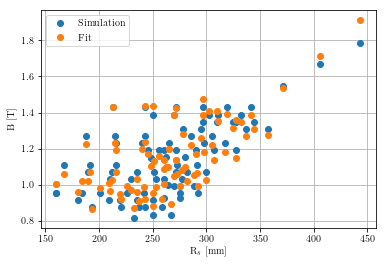

In [9]:
plt.plot(R4,B/B_rem,'o',label = 'Simulation')
plt.plot(R4,eta((R2,R3,R4),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [10]:
Erro = abs(B/B_rem - eta((R2,R3,R4),M1[0][0],M1[0][1],M1[0][2],M1[0][3]))/(B/B_rem)*100

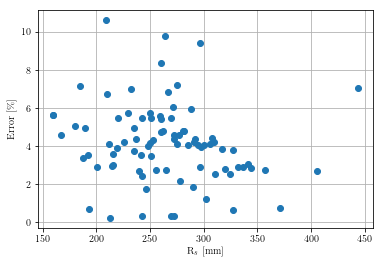

In [11]:
plt.plot(R4,Erro,'o')
plt.grid()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('Error [$\%$]')
plt.savefig('MagnetError.png',format = 'png', dpi=1000,bbox_inches='tight')

In [12]:
k = 0
for i in range(len(Erro)):
    if Erro[i] > 6:
        k = k+1

In [13]:
100-k/len(Erro)*100

87.20930232558139

In [14]:
B_error = np.arange(150,350,0.1)
B

array([1.2 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 ,
       1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 ,
       1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75,
       1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 ,
       1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35,
       1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 ,
       1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65,
       1.8 , 1.95, 2.1 , 2.25, 1.1 , 1.25, 1.55, 1.35, 1.25])

In [15]:
B

array([1.2 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 ,
       1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 ,
       1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75,
       1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 ,
       1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35,
       1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 ,
       1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65,
       1.8 , 1.95, 2.1 , 2.25, 1.1 , 1.25, 1.55, 1.35, 1.25])

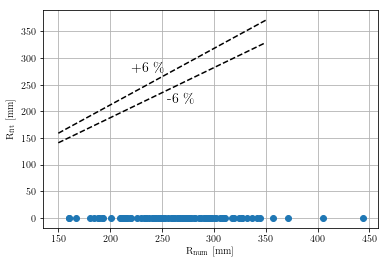

In [16]:
plt.plot(R4,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.94*B_error,'k--')
plt.plot(B_error,1.06*B_error,'k--')
plt.grid()
plt.text(255, 215, '-6 $\%$', fontsize=14)
plt.text(220, 275, '+6 $\%$', fontsize=14)
#plt.legend()
plt.xlabel('R$_\mathrm{num}$ [mm]')
plt.ylabel('R$_\mathrm{fit}$ [mm]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [17]:
R_m = np.arange(130,210,1)

[]

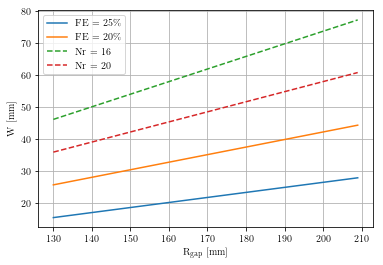

In [18]:
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.25)-5, label = 'FE = 25\%')
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.2)-5, label = 'FE = 20\%')

plt.plot(R_m,2*np.pi*R_m/(16)-5,'--', label = 'Nr = 16')
plt.plot(R_m,2*np.pi*R_m/(20)-5,'--', label = 'Nr = 20')

#plt.plot(R_m,2*np.pi*R_m/32,':', label = 'N = 20')
#lt.plot(R_m,np.pi*R_m*0.25/4, label = '4 poles - FM = 25\%')
#plt.plot(R_m,np.pi*R_m*0.35/4, label = '4 poles - FM = 35\%')
plt.xlabel('R$_\mathrm{gap}$ [mm]')
plt.ylabel('W [mm]')
plt.legend()
plt.grid()

plt.savefig('Rgap_W.png',format = 'png', dpi=1000,bbox_inches='tight')

plt.plot()

In [19]:
L_workbook = xlrd.open_workbook('Length.xlsx')
L_worksheet = L_workbook.sheet_by_name('Plan1')

In [20]:
R2_L = array(L_worksheet.col_values(0))
R3_L = array(L_worksheet.col_values(1))
R4_L = array(L_worksheet.col_values(2))
L_L = array(L_worksheet.col_values(3))
dQ_L = array(L_worksheet.col_values(4))

In [27]:
def eta_L(X,a,b,c,d,e,f,g): 
    P1,P2,P3,P4 = X
    #return (a*(P1**b)*(P2**c)*(P3**d)*np.log(e*P4))
    return (a*P4**3+b*P4**2 + c*P4 + d)*(P1**e*P2**f*P3**0)
    #return (a*P4**3+b*P4**2 + c*P4 + d)

In [28]:
M_L = curve_fit(eta_L,(R2_L,R3_L,R4_L,L_L),dQ_L,maxfev = 10000)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M_L[0],M_L[1]

C:\Users\Guilherme\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 0.45238549, -2.34797947,  4.06737728, -1.44601011, -0.14716104,
         0.15172723,  1.        ]), array([[inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf]]))

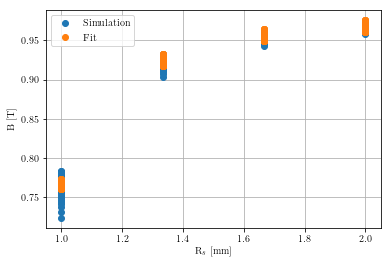

In [29]:
plt.plot(L_L,dQ_L,'o',label = 'Simulation')
plt.plot(L_L,eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [24]:
erro = (dQ_L-eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]))/dQ_L*100

In [32]:
L_xt = 0.05
R2 = 150
R3 = 250
(0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)

0.8400122355756672

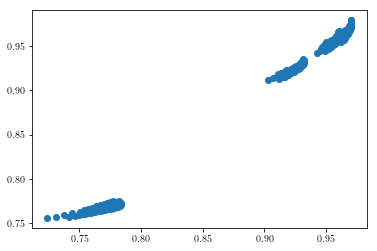

In [25]:
plt.plot(dQ_L,eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]),'o')

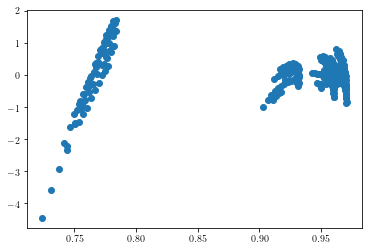

In [26]:
plt.plot(dQ_L,erro,'o')

array([1.31767113, 1.30961936, 1.31136879, 1.30981035, 1.3161477 ,
       1.31918015, 1.33884108, 1.33014567, 1.33136624, 1.32935829,
       1.33532849, 1.3380393 , 1.35968799, 1.35038288, 1.35109098,
       1.34865043, 1.35426518, 1.35666319, 1.38024458, 1.37033963,
       1.37056055, 1.36769815, 1.3729682 , 1.37507022, 1.20648847,
       1.1989788 , 1.20066547, 1.19871554, 1.20421427, 1.20613733,
       1.23057208, 1.22220255, 1.22315505, 1.22058182, 1.22554627,
       1.22701079, 1.25417757, 1.2449921 , 1.24523627, 1.24207303,
       1.24652568, 1.24755311, 1.27733558, 1.26736895, 1.26693833,
       1.26320577, 1.2671718 , 1.26778188, 1.30008482, 1.28936281,
       1.28828776, 1.28400921, 1.28750674, 1.28771309, 1.32244385,
       1.31099547, 1.30929884, 1.30449604, 1.30754627, 1.30736132,
       1.34443469, 1.33228142, 1.32999415, 1.32468228, 1.32730482,
       1.32674844, 1.36608268, 1.35325415, 1.35038962, 1.34458717,
       1.34679557, 1.34587798, 1.38740575, 1.37391434, 1.37049